In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

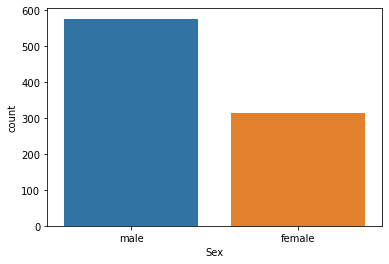

In [4]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

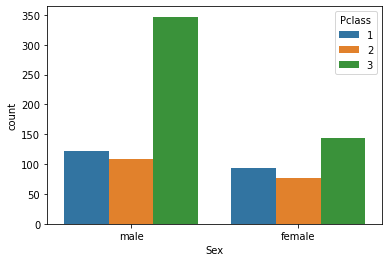

In [5]:
sns.countplot(df['Sex'],hue=df['Pclass'])

In [9]:
def male_female_child(passenger):
    Age,Sex=passenger
    if Age<16:
        return 'Child'
    else:
        return Sex

In [10]:
df['Passenger']=df[['Age','Sex']].apply(male_female_child,axis=1)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

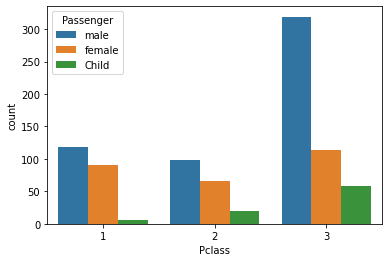

In [14]:
sns.countplot(df['Pclass'],hue=df['Passenger'])

<AxesSubplot:>

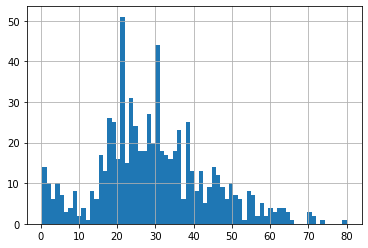

In [16]:
df['Age'].hist(bins=70)

In [17]:
df['Age'].mean()

29.69911764705882

In [18]:
df['Passenger'].value_counts()

male      537
female    271
Child      83
Name: Passenger, dtype: int64

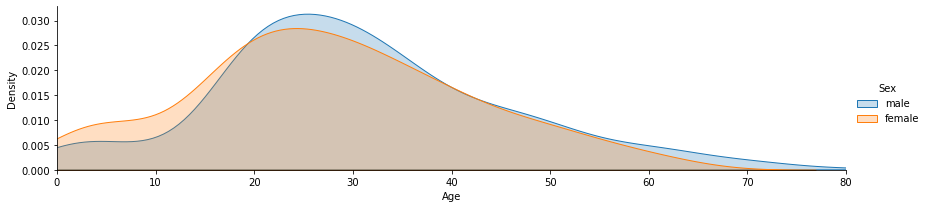

In [26]:
fig= sns.FacetGrid(df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

fig.set(xlim=(0,df['Age'].max()))

fig.add_legend()

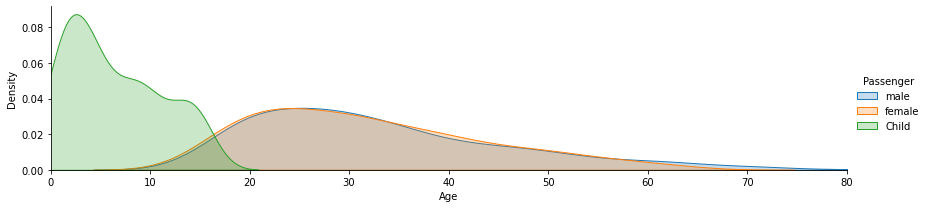

In [27]:
fig= sns.FacetGrid(df,hue='Passenger',aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

fig.set(xlim=(0,df['Age'].max()))

fig.add_legend()

In [28]:
deck=df['Cabin'].dropna()

In [30]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

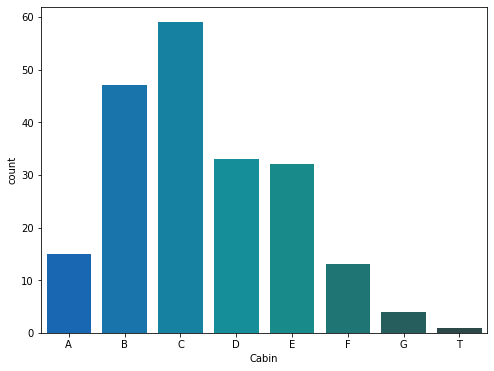

In [73]:
levels=[]

for level in deck:
    levels.append(level[0])
    
cabin_df=pd.DataFrame(levels)
cabin_df.columns=['Cabin']

plt.figure(figsize=(8,6))
sns.countplot(cabin_df['Cabin'],palette='winter_d',order='ABCDEFGT')


In [75]:
cabin_df['Cabin']=cabin_df[cabin_df.Cabin !='T']

<AxesSubplot:xlabel='Cabin', ylabel='count'>

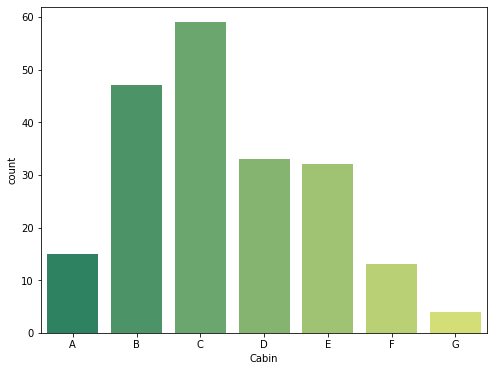

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(cabin_df['Cabin'],palette='summer',order='ABCDEFG')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

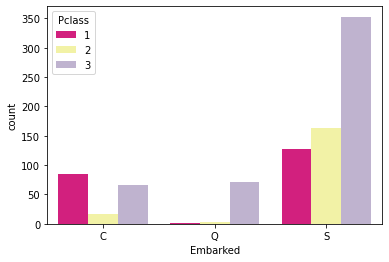

In [84]:
sns.countplot(df['Embarked'],order='CQS',hue=df['Pclass'],palette='Accent_r')

In [85]:
 df['Family_meb']=df['SibSp']+df['Parch']

In [86]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Family_meb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0


In [97]:
df['Family_meb'].loc[df['Family_meb']==0]='Alone'

df['Family_meb'].loc[df['Family_meb'] !='Alone']='With Family'

In [98]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Family_meb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


<AxesSubplot:xlabel='Family_meb', ylabel='count'>

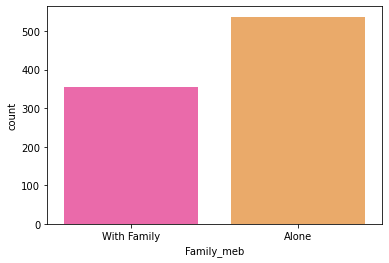

In [102]:
sns.countplot(df['Family_meb'],palette='spring')

In [103]:
df['Survivor']=df['Survived'].map({0:'No',1:'Yes'})

<AxesSubplot:xlabel='Survivor', ylabel='count'>

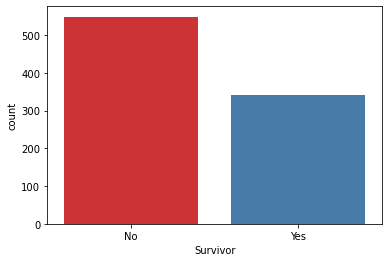

In [104]:
sns.countplot(df['Survivor'],palette='Set1')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

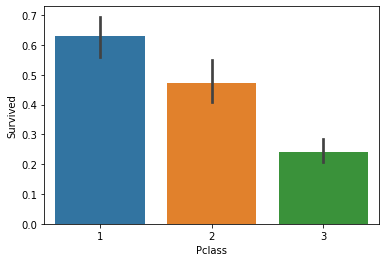

In [114]:
sns.barplot(df['Pclass'],df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

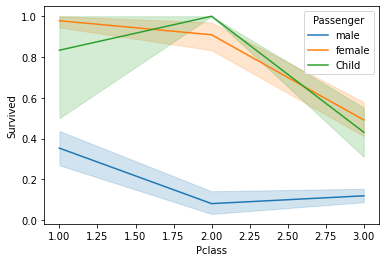

In [116]:
sns.lineplot(df['Pclass'],df['Survived'],hue=df['Passenger'],)

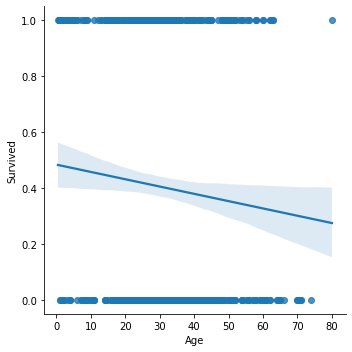

In [118]:
sns.lmplot('Age','Survived',data=df)

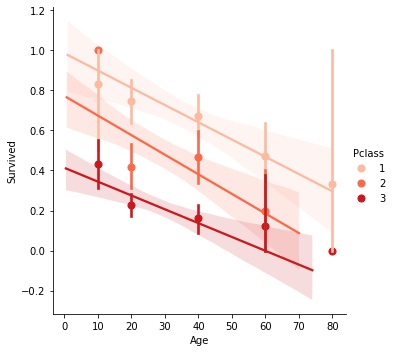

In [122]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',data=df,hue='Pclass',palette='Reds',x_bins=generations)

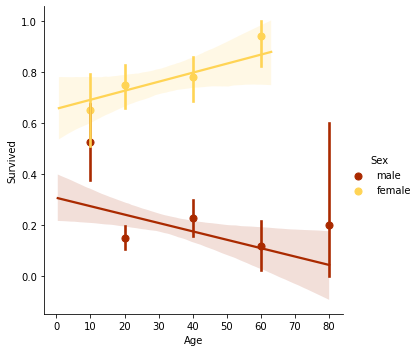

In [123]:
sns.lmplot('Age','Survived',hue='Sex',data=df,x_bins=generations,palette='afmhot')